In [56]:
# импортируем всё необходимое с учетом настроек с семинара
import pandas as pd
import seaborn as sn
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import os
from openpyxl import load_workbook
from openpyxl.styles import Border, Side, Font
# Вывод таблицы в удобном формате
from tabulate import tabulate
from scipy.stats import norm, t, chi2
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(legacy='1.21')
np.set_printoptions(suppress=True)
import matplotlib.pyplot as pt
pt.rcParams["font.size"] = 14
pt.rcParams['figure.figsize'] = (15, 8)
sn.set_style("whitegrid")

## Задача 2

#### 1. Чтение файла

In [57]:
gpa = pd.read_csv(r'C:\Users\admin\metrix1-2024-hw3\GPA2.txt', delimiter = '\t') # учитываем, что файл с расширением txt
gpa

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq,Unnamed: 12
0,920,43,2.040,1,0.484,0.100,4,40.000,1,0,0,0.010,NaN
1,1170,18,4.000,0,0.828,9.400,191,20.319,0,1,0,88.360,NaN
2,810,14,1.780,1,0.884,1.190,42,35.294,0,1,0,1.416,NaN
3,940,40,2.420,0,0.808,5.710,252,44.133,0,1,0,32.604,NaN
4,1180,18,2.610,0,0.735,2.140,86,40.187,0,1,0,4.580,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,990,49,2.240,0,1.020,2.330,89,38.197,1,1,0,5.429,NaN
4133,900,50,2.460,0,0.957,0.100,2,20.000,1,1,0,0.010,NaN
4134,1340,62,4.000,0,0.942,0.450,1,2.222,0,1,0,0.203,NaN
4135,980,12,2.830,0,0.690,0.350,23,65.714,1,1,0,0.122,NaN


#### 2. Вывод суммарных статистик и их сохранение в таблицу эксель

In [58]:
df = gpa[['hsize', 'female', 'black']]
df = df.describe().transpose() # транспонируем полученную табличку, чтобы было красивее
df

,count,mean,std,min,25%,50%,75%,max
hsize,4137.000,2.800,1.737,0.030,1.650,2.510,3.680,9.400
female,4137.000,0.450,0.498,0.000,0.000,0.000,1.000,1.000
black,4137.000,0.055,0.229,0.000,0.000,0.000,0.000,1.000


In [59]:
def save_to_excel(file, name):
    folder = r'C:\Users\admin\metrix1-2024-hw3' # задаем сразу папку с дз, куда будут сохраняться все файлы
    filepath = os.path.join(folder, name)
    if not name.endswith('.xlsx'):
        filepath += '.xlsx' # добавляем к имени файла нужное расширение
    try:
        file.to_excel(filepath) # сохраняем файл по указанному пути в папку
        wb = load_workbook(filepath) # загружаем сохраненную книгу эксель для дальнейшей работы с ней
        ws = wb.active
        thin = Side(border_style="thin", color="000000") # далее настраиваем прочерчивание границ в таблице
        border = Border(left=thin, right=thin, top=thin, bottom=thin)
        for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
            for cell in row:
                cell.border = border
        wb.save(filepath) # сохраняем изменения по указанному пути
        print(f'Таблица сохранена под именем {name}')
    except Exception as e:
        print(f'Произошла ошибка при сохранении: {e}') # выводим описание ошибки в удобном читаемом виде, если что-то пошло не так


In [60]:
save_to_excel(df, 'characteristics')

Таблица сохранена под именем characteristics


#### 3. Регрессия

In [61]:
gpa['fb'] = gpa['female']*gpa['black']
gpa

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq,Unnamed: 12,fb
0,920,43,2.040,1,0.484,0.100,4,40.000,1,0,0,0.010,NaN,0
1,1170,18,4.000,0,0.828,9.400,191,20.319,0,1,0,88.360,NaN,0
2,810,14,1.780,1,0.884,1.190,42,35.294,0,1,0,1.416,NaN,0
3,940,40,2.420,0,0.808,5.710,252,44.133,0,1,0,32.604,NaN,0
4,1180,18,2.610,0,0.735,2.140,86,40.187,0,1,0,4.580,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,990,49,2.240,0,1.020,2.330,89,38.197,1,1,0,5.429,NaN,0
4133,900,50,2.460,0,0.957,0.100,2,20.000,1,1,0,0.010,NaN,0
4134,1340,62,4.000,0,0.942,0.450,1,2.222,0,1,0,0.203,NaN,0
4135,980,12,2.830,0,0.690,0.350,23,65.714,1,1,0,0.122,NaN,0


In [62]:
y = gpa['sat'] # задаем зависимую переменную
X = sm.add_constant(gpa[['hsize', 'hsizesq', 'female', 'black', 'fb']]) # добавляем технический коэффициент (константу) к регрессору

reg_sat = sm.OLS(y, X).fit(cov_type='HC0') # задаем гетероскедастичность для ошибок (std errors) (по умолчанию была бы гомоскедастичность)
reg_sat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     74.63
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           4.51e-75
Time:                        20:20:55   Log-Likelihood:                -26110.
No. Observations:                4137   AIC:                         5.223e+04
Df Residuals:                    4131   BIC:                         5.227e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1028.0972      6.355    161.777      0.000    1015.642    1040.553
hsize         19.2971      3.814      5.060      0.000      11.822      26.772
hsizesq       -2.1948      0.524     -4.190      0.000      -3.221      -1.168
female       -45.0915      4.226    -10.669      0.000     -53.375     -36.808
black       -169.8126     15.423    -11.010      0.000    -200.041    -139.584
fb            62.3064     19.305      3.227      0.001      24.468     100.144
==============================================================================
Omnibus:                       11.500   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.489
Skew:                           0.127   Prob(JB):                      0.00320
Kurtosis:                       3.051   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [63]:
def save_regression_results(results, name):
    model_names = ['SAT']
    data = {}
    folder = r'C:\Users\admin\metrix1-2024-hw3'
    filepath = os.path.join(folder, name)
    if not name.endswith('.xlsx'):
        filepath += '.xlsx'
    if not isinstance(results, (list, tuple)):
        results = [results]
    for model_name, result in zip(model_names, results): # передаем этим переменным нужные нам значения из анализа регрессии
        params = result.params
        conf = result.bse
        pvalues = result.pvalues
        r2 = result.rsquared
        nobs = int(result.nobs)

        model_data = {}
        for var in ['const', 'hsize', 'hsizesq', 'female', 'black', 'fb']:
            if var in params:
                signif = "***" if pvalues[var] < 0.01 else ("**" if pvalues[var] < 0.05 else ("*" if pvalues[var] < 0.1 else "")) # задаем параметры из задания для звездочек
                model_data[var] = f"{params[var]:.3f}{signif} ({conf[var]:.3f})" # выводим ошибку в скобках
            else:
                model_data[var] = "-"

        model_data["Observations"] = f"{nobs}" # добавляем число наблюдений и R^2
        model_data["R^2"] = f"{r2:.3f}"

        data[model_name] = model_data

    df = pd.DataFrame(data) # переводим в датафрейм

    df = df.loc[['hsize', 'hsizesq', 'female', 'black', 'fb', 'const', 'Observations', 'R^2']]
    
    df.to_excel(filepath) # сохраняем в эксель

    wb = load_workbook(filepath)
    ws = wb.active

    new_row_names = ['размер класса (100 чел.)', 'квадрат размера класса', 'пол (1, если Ж)', 'раса (1, если темнокожий)', '1, если темнокожая Ж', 'константа', 'Число наблюдений', 'R^2'] # переименовываем строки
    for row_num, new_name in enumerate(new_row_names, start=2): 
        ws.cell(row=row_num, column=1, value=new_name)

    thin = Side(border_style="thin", color="000000") # прочерчиваем границы и задаем их ширину
    border = Border(left=thin, right=thin, top=thin, bottom=thin)
    for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
        for cell in row:
            cell.border = border
    for column in ws.columns:
        max_length = 0
        column_letter = column[0].column_letter 
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except Exception as e:
                pass
        adjusted_width = (max_length + 2) 
        ws.column_dimensions[column_letter].width = adjusted_width

    wb.save(filepath)

    print(f'Таблица сохранена под именем "{name}"')

In [64]:
save_regression_results(reg_sat, 'результаты регрессии')

Таблица сохранена под именем "результаты регрессии"


#### 5. Статистическая значимость коэффициентов

In [65]:
regressor_names = reg_sat.params.index.to_list()
coefficients = reg_sat.params
standard_errors = reg_sat.bse
t_statistics = reg_sat.tvalues
p_values = reg_sat.pvalues

print(p_values)

const     0.000
hsize     0.000
hsizesq   0.000
female    0.000
black     0.000
fb        0.001
dtype: float64


In [66]:
alpha = 0.05
z_crit = 1.96
stat_significance_df = pd.Series()

for regressor_name, z in t_statistics.items():
    is_significant = np.abs(z) > z_crit # critical rule
    stat_significance_df[regressor_name] = is_significant

print('Following table shows whether regressor is significant or not at 5% level')
display(stat_significance_df)

Following table shows whether regressor is significant or not at 5% level


const      True
hsize      True
hsizesq    True
female     True
black      True
fb         True
dtype: bool

Итак, мы не можем отвергнуть нулевую гипотезу о статистической незначимости какого-либо коэффициента данной регресии на уровне значимости 5%

#### 5. Зависимость SAT от пола

In [67]:
print(coefficients)

const     1028.097
hsize       19.297
hsizesq     -2.195
female     -45.091
black     -169.813
fb          62.306
dtype: float64


Интерпретация прогнозирования:
Поскольку функция недифференцируема, производную брать не можем. Переменные бинарные, можем интерпретировать конкретнее.
В среднем при прочих равных условиях при сравнении средних результатов выпускных тестов (с одинаковыми суммарным размером выпускных классов в школе):

уравнение для мужчин (female = 0): sat = b0 + b1*hsize + b2*hsizesqr + b4*black + u

уравнение для женщин (female = 1): sat = b0 + b1*hsize + b2*hsizesqr + b3 + b4*black + b5*black + u

Таким образом, уравнение для женщин отличается на (-45,091+62,306*black) по сравнению с мужчинами в среднем при прочих равных условиях.

В среднем при прочих равных условиях при сравнении средних результатов выпускных тестов (с одинаковыми суммарным размером выпускных классов в школе):
- у темнокожих женщин они выше на 17,215 баллов по сравнению с темнокожими мужчинами;
- у нетемнокожих женщин они ниже на 45,091 балла по сравнению с нетемнокожими мужчинами.

#### 6. Зависимость SAT от расы

Интерпретация прогнозирования: В среднем при прочих равных условиях при сравнении средних результатов выпускных тестов (с одинаковым суммарным размером выпускных классов в школе):

уравнение для людей другой расы (black = 0): sat = b0 + b1*hsize + b2*hsizesqr + b3*female + u

уравнение для темнокожих (black = 1): sat = b0 + b1*hsize + b2*hsizesqr + b3*female + b4 + b5*female + u

Таким образом, результаты теста для темнокожих людей отличается на (-169,813+62,306*female) баллов по сравнению с другими расами в меньшую сторону в средних при прочих равных условиях.

у темнокожих людей они отличаются на (-169,813+62,306*female) по сравнению с другими расами в меньшую сторону.

В среднем при прочих равных условиях при сравнении средних результатов выпускных тестов (с одинаковым суммарным размером выпускных классов в школе):
- у темнокожих женщин они ниже на 107,507 баллов по сравнению с нетемнокожими женщинами;
- у темнокожих мужчин они ниже на 169,813 баллов по сравнению с нетемнокожими мужчинами.

#### 7. Зависимость SAT от суммарного размера выпускных классов в школе

In [68]:
-2.195*2

-4.39

Интерпретация прогнозирования: в среднем при прочих равных условиях при сравении среднего результата выпускных тестов для двух наблюдений с одинаковым полом и расой (либо темнокожей, либо другой) и суммарными размерами выпускных классов в школе, отличающимися на дельту (маленькое), средние результаты выпускных тестов отличаются на (19,297 - 4,39*hsize)*дельта

Протестируем обоснованность включения нелинейной зависимости относительно hsize в регрессию с помощью Ramsey RESET

In [69]:
gpa['hsize3'] = gpa['hsize']**3

In [70]:
y = gpa['sat'] # задаем зависимую переменную
X = sm.add_constant(gpa[['hsize', 'female', 'black', 'fb']]) # добавляем технический коэффициент (константу) к регрессору

reg_1 = sm.OLS(y, X).fit(cov_type='HC0') # задаем гетероскедастичность для ошибок (std errors) (по умолчанию была бы гомоскедастичность)

In [71]:
y1 = gpa['sat'] # задаем зависимую переменную
X1 = sm.add_constant(gpa[['hsize', 'hsizesq', 'hsize3', 'female', 'black', 'fb']]) # добавляем технический коэффициент (константу) к регрессору

reg_2 = sm.OLS(y1, X1).fit(cov_type='HC0')

In [72]:
hypothesis = 'hsizesq = 0, hsize3 = 0'
wald_test_result = reg_2.wald_test(hypothesis, scalar = True)
print(wald_test_result)
is_hypo_rejected = wald_test_result.pvalue < alpha
print(f'Нулевая гипотеза должна быть отвергнута на 5% уровне значимости : {is_hypo_rejected}')

<Wald test (chi2): statistic=17.57437929468605, p-value=0.00015267643996289283, df_denom=2>
Нулевая гипотеза должна быть отвергнута на 5% уровне значимости : True


Таким образом, в базовой регрессии мы не учли нелинейную зависимость, которая действительно значима на ур значимости 5%. С экономической точки зрения, это может быть связано с высокими темпами прироста баллов за тест при низких показателях размера выпускных классов. Потом этот эффект достигает своего пика (в вершине параболы) и после этого зависимость становится обратная (чем больше людей в выпускных классов, тем ниже баллы в среднем при прочих равных).

Посмотрим это графически

#### Без нелинейной зависимости

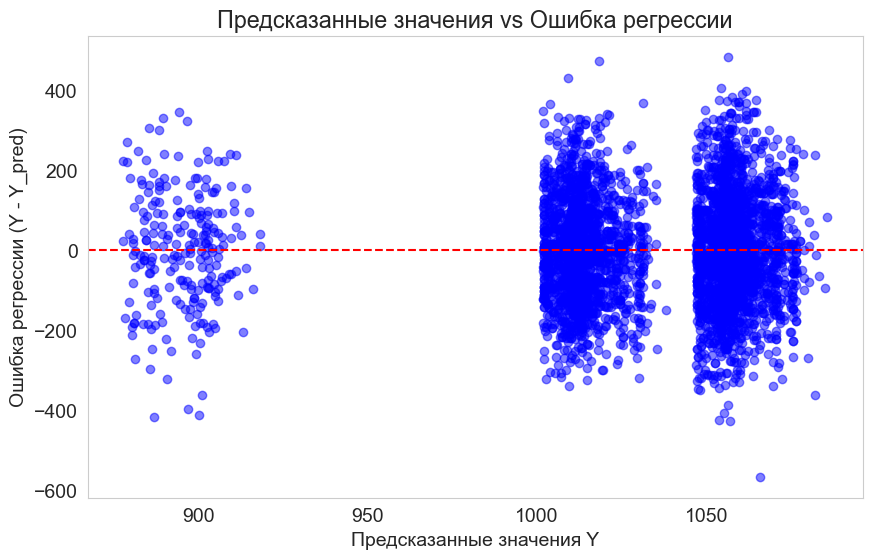

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Получаем предсказанные значения
y_pred = reg_1.predict(X)

# Вычисляем ошибку регрессии
error = y - y_pred

pt.figure(figsize=(10, 6))
pt.scatter(y_pred, error, color='blue', alpha=0.5)
pt.axhline(0, color='red', linestyle='--')
pt.title('Предсказанные значения vs Ошибка регрессии')
pt.xlabel('Предсказанные значения Y')
pt.ylabel('Ошибка регрессии (Y - Y_pred)')
pt.grid()
pt.show()


#### С нелинейной зависимостью

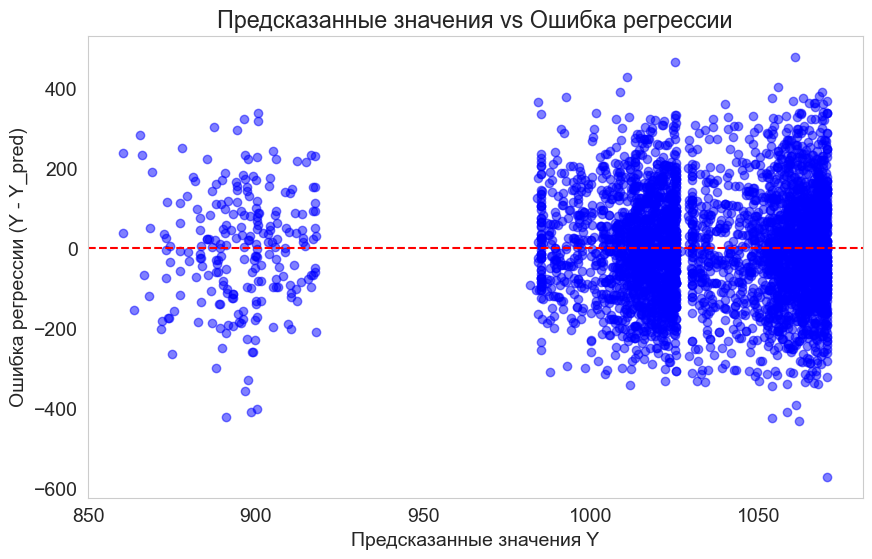

In [74]:
y_pred1 = reg_2.predict(X1)

error1 = y1 - y_pred1

pt.figure(figsize=(10, 6))
pt.scatter(y_pred1, error1, color='blue', alpha=0.5)
pt.axhline(0, color='red', linestyle='--')
pt.title('Предсказанные значения vs Ошибка регрессии')
pt.xlabel('Предсказанные значения Y')
pt.ylabel('Ошибка регрессии (Y - Y_pred)')
pt.grid()
pt.show()

Данные стали больше походить на облако, более равномерно распределены вдоль 0, значит, нелинейную зависимость лучше добавить

#### Наилучший средний результат тестирования от размера классов

Поскольку размер классов влияет на регрессию в среднем при прочих равных как парабола (ветвями вниз), наилучший средний результат будет в ее вершине

In [75]:
print(coefficients)

const     1028.097
hsize       19.297
hsizesq     -2.195
female     -45.091
black     -169.813
fb          62.306
dtype: float64


In [100]:
# hsize_optimum = -b1/(2*b2) = g(b1, b2)
# оценить это необходимо дельта-методом
b1 = reg_sat.params['hsize']
b2 = reg_sat.params['hsizesq']
hsize_optimum = - b1/(2*b2)
print(f'Оптимальный размер класса (в сотнях человек): {hsize_optimum}')

Оптимальный размер класса (в сотнях человек): 4.396029630466278


In [82]:
print(reg_sat.cov_HC0)

[[  40.3865154   -20.19919354    2.33509464   -9.03189282  -11.53629612
     8.21052507]
 [ -20.19919354   14.54541079   -1.90028898    0.07840444    1.2618329
     0.06876295]
 [   2.33509464   -1.90028898    0.27438664   -0.00003762   -0.07789534
     0.03118676]
 [  -9.03189282    0.07840444   -0.00003762   17.86300095    8.8201937
   -17.81675383]
 [ -11.53629612    1.2618329    -0.07789534    8.8201937   237.86350499
  -237.36765199]
 [   8.21052507    0.06876295    0.03118676  -17.81675383 -237.36765199
   372.70216082]]


In [102]:
cov_matrix = reg_sat.cov_HC0[1:3, 1:3]
cov_matrix

array([[14.54541079, -1.90028898],
       [-1.90028898,  0.27438664]])

In [108]:
# gradient = ( 0   -1/(2*b2)  b1/(2*(b2)^2) 0   0)
# gradient = (0   0.2278    0.10373   0   0)
# We calculate the standard error for and the 95% confidence interval
a = -1/(2*b2)
s = b1/(2*(b2**2))
grad = np.array([a, s])

se = np.sqrt(grad.T @ cov_matrix @ grad)

print(se)

0.34852989947607094


#### Доверительный интервал

In [109]:
left = hsize_optimum - norm.ppf(0.975) * se 
right =  hsize_optimum + norm.ppf(0.975) * se 

print('CI : ', '(', left, ' , ', right, ')', sep = '')

CI : (3.7129235799578133 , 5.079135680974742)


#### 9. Другие переменные

По датасету очевидно, что white и black - не все возможные расы (тк есть данные, где оба столбца 0), значит, white тожк можно добавить в регрессию и посмотреть уровень значимости (проблемы мультиколлинеарности не возникнет).

In [93]:
gpa

,sat,tothrs,colgpa,athlete,verbmath,hsize,hsrank,hsperc,female,white,black,hsizesq,Unnamed: 12,fb,hsize3
0,920,43,2.040,1,0.484,0.100,4,40.000,1,0,0,0.010,NaN,0,0.001
1,1170,18,4.000,0,0.828,9.400,191,20.319,0,1,0,88.360,NaN,0,830.584
2,810,14,1.780,1,0.884,1.190,42,35.294,0,1,0,1.416,NaN,0,1.685
3,940,40,2.420,0,0.808,5.710,252,44.133,0,1,0,32.604,NaN,0,186.169
4,1180,18,2.610,0,0.735,2.140,86,40.187,0,1,0,4.580,NaN,0,9.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,990,49,2.240,0,1.020,2.330,89,38.197,1,1,0,5.429,NaN,0,12.649
4133,900,50,2.460,0,0.957,0.100,2,20.000,1,1,0,0.010,NaN,0,0.001
4134,1340,62,4.000,0,0.942,0.450,1,2.222,0,1,0,0.203,NaN,0,0.091
4135,980,12,2.830,0,0.690,0.350,23,65.714,1,1,0,0.122,NaN,0,0.043


In [94]:
y = gpa['sat'] # задаем зависимую переменную
X = sm.add_constant(gpa[['hsize', 'hsizesq', 'female', 'black', 'white', 'fb']]) # добавляем технический коэффициент (константу) к регрессору

reg_white = sm.OLS(y, X).fit(cov_type='HC0') # задаем гетероскедастичность для ошибок (std errors) (по умолчанию была бы гомоскедастичность)
reg_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     63.01
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           4.30e-75
Time:                        20:48:37   Log-Likelihood:                -26108.
No. Observations:                4137   AIC:                         5.223e+04
Df Residuals:                    4130   BIC:                         5.227e+04
Df Model:                           6                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        996.3737     18.156     54.878      0.000     960.788    1031.959
hsize         19.2921      3.812      5.060      0.000      11.820      26.764
hsizesq       -2.1960      0.523     -4.195      0.000      -3.222      -1.170
female       -45.2699      4.222    -10.723      0.000     -53.544     -36.996
black       -138.0646     22.822     -6.050      0.000    -182.795     -93.334
white         32.4872     17.083      1.902      0.057      -0.995      65.970
fb            62.4782     19.304      3.237      0.001      24.643     100.314
==============================================================================
Omnibus:                       12.138   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.140
Skew:                           0.131   Prob(JB):                      0.00231
Kurtosis:                       3.044   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Однако переменная white оказалась незначимой на 5% уровне значимости. Хотя на 10% уровне она значима, поэтому исследовать ее все равно можно

In [117]:
y = gpa['sat'] # задаем зависимую переменную
X = sm.add_constant(gpa[['hsize', 'hsizesq', 'female', 'black', 'fb', 'hsrank']]) # добавляем технический коэффициент (константу) к регрессору

reg_hsrank = sm.OLS(y, X).fit(cov_type='HC0') # задаем гетероскедастичность для ошибок (std errors) (по умолчанию была бы гомоскедастичность)
reg_hsrank.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     121.1
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.20e-141
Time:                        21:58:43   Log-Likelihood:                -25920.
No. Observations:                4137   AIC:                         5.185e+04
Df Residuals:                    4130   BIC:                         5.190e+04
Df Model:                           6                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1039.3166      6.247    166.374      0.000    1027.073    1051.560
hsize         24.7296      3.742      6.608      0.000      17.395      32.064
hsizesq       -0.3974      0.518     -0.767      0.443      -1.412       0.618
female       -54.8005      4.079    -13.435      0.000     -62.795     -46.806
black       -159.2316     13.659    -11.658      0.000    -186.002    -132.461
fb            45.9047     17.469      2.628      0.009      11.665      80.144
hsrank        -0.7895      0.047    -16.976      0.000      -0.881      -0.698
==============================================================================
Omnibus:                        7.177   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.197
Skew:                           0.102   Prob(JB):                       0.0274
Kurtosis:                       2.992   Cond. No.                         845.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Здесь резко вырос скорректированный R^2, что говорит о том, что теперь наша модель объясняет гораздо больший процент данных. Однако достаточно резко упала значимость hsizesq, что может свидетельствовать о сильной корреляции между ней и нашей новой переменной, а значит, их вместе в модель лучше не добавлять. Также сильно вырос Cond. No., что тоже явлется не самым хорошим знаком.

In [118]:
y = gpa['sat'] # задаем зависимую переменную
X = sm.add_constant(gpa[['hsize', 'hsizesq', 'female', 'black', 'fb', 'verbmath']]) # добавляем технический коэффициент (константу) к регрессору

reg_verbmath = sm.OLS(y, X).fit(cov_type='HC0') # задаем гетероскедастичность для ошибок (std errors) (по умолчанию была бы гомоскедастичность)
reg_verbmath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     62.34
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           2.66e-74
Time:                        21:58:46   Log-Likelihood:                -26109.
No. Observations:                4137   AIC:                         5.223e+04
Df Residuals:                    4130   BIC:                         5.228e+04
Df Model:                           6                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1013.7964     13.881     73.033      0.000     986.589    1041.003
hsize         19.3456      3.814      5.072      0.000      11.870      26.821
hsizesq       -2.1896      0.523     -4.183      0.000      -3.216      -1.164
female       -46.0201      4.306    -10.688      0.000     -54.460     -37.581
black       -170.0225     15.410    -11.034      0.000    -200.225    -139.820
fb            62.7596     19.289      3.254      0.001      24.953     100.566
verbmath      16.4956     14.205      1.161      0.246     -11.345      44.336
==============================================================================
Omnibus:                       10.582   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.563
Skew:                           0.122   Prob(JB):                      0.00509
Kurtosis:                       3.047   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

При добавлении переменной verbmath характеристики регрессии практически не изменились

In [114]:
def save_regression_results1(results, name):
    model_names = ['регрессия с white', 'регрессия c hsrank', 'регрессия с verbmath']
    data = {}
    folder = r'C:\Users\admin\metrix1-2024-hw3'
    filepath = os.path.join(folder, name)
    if not name.endswith('.xlsx'):
        filepath += '.xlsx'
    for model_name, result in zip(model_names, results): # передаем этим переменным нужные нам значения из анализа регрессии
        params = result.params
        conf = result.bse
        pvalues = result.pvalues
        r2 = result.rsquared
        nobs = int(result.nobs)

        model_data = {}
        for var in ['const', 'hsize', 'hsizesq', 'female', 'black', 'white', 'fb', 'hsrank', 'verbmath']:
            if var in params:
                signif = "***" if pvalues[var] < 0.01 else ("**" if pvalues[var] < 0.05 else ("*" if pvalues[var] < 0.1 else "")) # задаем параметры из задания для звездочек
                model_data[var] = f"{params[var]:.3f}{signif} ({conf[var]:.3f})" # выводим ошибку в скобках
            else:
                model_data[var] = "-"

        model_data["Observations"] = f"{nobs}" # добавляем число наблюдений и R^2
        model_data["R^2"] = f"{r2:.3f}"

        data[model_name] = model_data

    df = pd.DataFrame(data) # переводим в датафрейм

    df = df.loc[['hsize', 'hsizesq', 'female', 'black', 'white', 'fb', 'hsrank', 'verbmath', 'const', 'Observations', 'R^2']]
    
    df.to_excel(filepath) # сохраняем в эксель

    wb = load_workbook(filepath)
    ws = wb.active

    # new_column_names = ['зарплата', 'зарплата', 'log зарплаты', 'log зарплаты'] # переименовываем колонки
    # for col_num, new_name in enumerate(new_column_names, start=2):
    #     ws.cell(row=1, column=col_num, value=new_name)

    new_row_names = ['размер класса (100 чел.)', 'квадрат размера класса', 'пол (1, если Ж)', 'раса (1, если темнокожий)', 'раса (1, если белокожий)',
                     '1, если темнокожая Ж', 'рейтинг', 'рейтинг за verbmath SAT', 'константа', 'Число наблюдений', 'R^2'] # переименовываем строки
    for row_num, new_name in enumerate(new_row_names, start=2): 
        ws.cell(row=row_num, column=1, value=new_name)

    thin = Side(border_style="thin", color="000000") # прочерчиваем границы и задаем их ширину
    border = Border(left=thin, right=thin, top=thin, bottom=thin)
    for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
        for cell in row:
            cell.border = border
    for column in ws.columns:
        max_length = 0
        column_letter = column[0].column_letter 
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except Exception as e:
                pass
        adjusted_width = (max_length + 2) 
        ws.column_dimensions[column_letter].width = adjusted_width

    wb.save(filepath)

    print(f'Таблица сохранена под именем {name}')

In [120]:
save_regression_results1([reg_white, reg_hsrank, reg_verbmath], 'regressions')

Таблица сохранена под именем regressions
